<a href="https://colab.research.google.com/github/Euan-J-Austin/100-days-of-code/blob/master/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%cd /content/drive/MyDrive/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression

/content/drive/.shortcut-targets-by-id/19DFaxKzsTyJQzT1s4FwLYh5D9XB9MI1N/Business Analyst course/Statistics and Descriptive Analytics/Logistic Regression


In [2]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('spam.csv')

In [4]:
# tts before preprocessing to prevent leakage

y = df.yesno
x = df.iloc[:,:-1] #all but the last
X = sm.add_constant(x)

from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y,
                                       test_size = 0.2,
                                       random_state = 1502)

In [5]:
df = pd.concat([X_train, y_train], axis=1)
df

,const,crl.tot,dollar,bang,money,n000,make,yesno
506,1.0,279,0.173,0.130,0.0,0.31,0.00,y
2372,1.0,25,0.000,0.000,0.0,0.00,0.00,n
972,1.0,543,0.037,1.046,0.0,0.00,0.00,y
891,1.0,44,0.000,1.326,0.0,0.00,0.00,y
4593,1.0,6,0.000,1.052,0.0,0.00,0.00,n
...,...,...,...,...,...,...,...,...
757,1.0,173,0.932,0.435,0.0,1.47,0.00,y
953,1.0,621,0.000,2.077,0.0,0.00,0.00,y
444,1.0,144,0.000,0.000,0.0,0.00,0.27,y
4145,1.0,124,0.000,0.000,0.0,0.00,0.00,n


# CONCEPT

RELATION BETWEEN A DISCRETE (BINARY) C.F. CONTINUOUS DEPENDENT VARIABLE AND AT LEAST ONE INDEPENDENT VARIABLE

INTUITION ... WHAT IS THE IMPACT OF X ON Y?

S-SHAPED CURVES INFLUENCING THE READING OF COEFFICIENTS

# OVERVIEW OF DATA

In [6]:
df.head()

,const,crl.tot,dollar,bang,money,n000,make,yesno
506,1.0,279,0.173,0.130,0.0,0.31,0.0,y
2372,1.0,25,0.000,0.000,0.0,0.00,0.0,n
972,1.0,543,0.037,1.046,0.0,0.00,0.0,y
891,1.0,44,0.000,1.326,0.0,0.00,0.0,y
4593,1.0,6,0.000,1.052,0.0,0.00,0.0,n


In [7]:
df.describe()

,const,crl.tot,dollar,bang,money,n000,make
count,3680.0,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000,3680.000000
mean,1.0,283.597554,0.076817,0.264790,0.087375,0.103959,0.103533
std,0.0,585.456976,0.247261,0.842495,0.403392,0.358982,0.304857
min,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,94.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.0,267.000000,0.051000,0.302750,0.000000,0.000000,0.000000
max,1.0,10062.000000,6.003000,32.478000,9.750000,5.450000,4.540000


# OUTLIERS

array([[<Axes: title={'center': 'const'}>,
        <Axes: title={'center': 'crl.tot'}>,
        <Axes: title={'center': 'dollar'}>],
       [<Axes: title={'center': 'bang'}>,
        <Axes: title={'center': 'money'}>,
        <Axes: title={'center': 'n000'}>],
       [<Axes: title={'center': 'make'}>, <Axes: >, <Axes: >]],
      dtype=object)

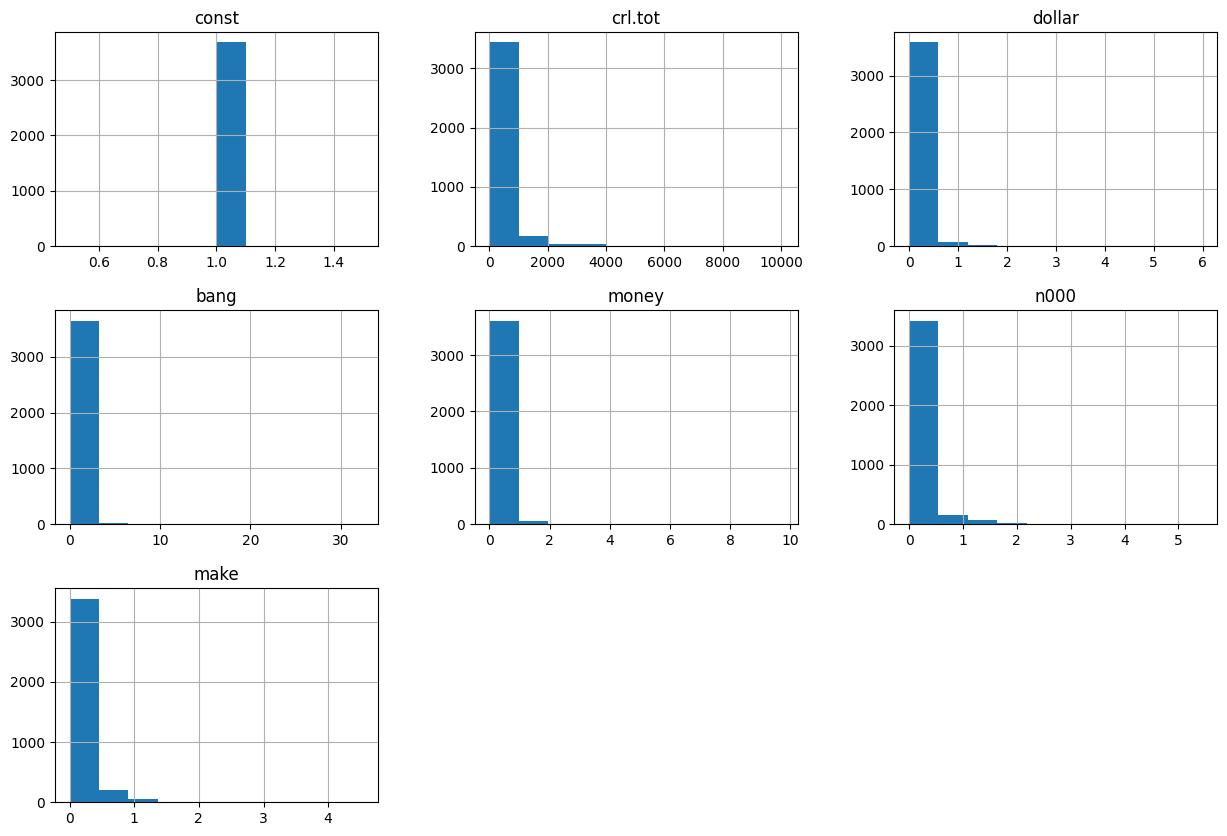

In [8]:
df.hist(figsize = [15,10])

In [9]:
len(df)

3680

In [10]:
df = df[df['crl.tot'] < 1500]
len(df)

3568

In [11]:
df = df[df['bang'] < 5]
len(df)

3552

In [12]:
df = df[df['money'] < 4]
len(df)

3544

In [13]:
df = df[df['dollar'] < 5]
len(df)

3542

In [14]:
df = df[df['n000'] < 3]
len(df)

3534

In [15]:
df = df[df['make'] < 3]
len(df)

3530

In [16]:
df.money.max()

3.61

# CORRELATION MATRIX

<ipython-input-17-5640a59f2a9c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


<Axes: >

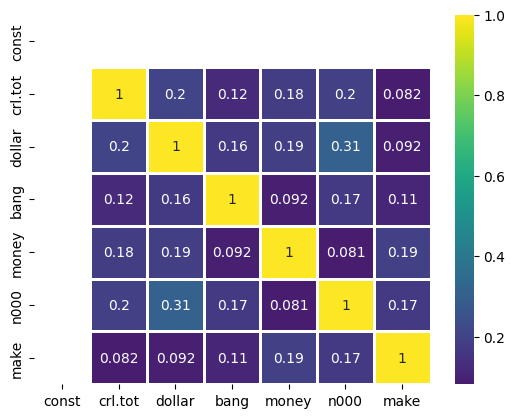

In [17]:
sns.heatmap(df.corr(),
            center = 0.5,
            cmap = 'viridis',
            annot = True,
            fmt = '.2g',
            linewidths = 1,
            linecolor = 'white')

NO SIGNIFICANT MULTICOLINEARITY.

# TRANSFORMING THE DEPENDENT VARIABLE

NEEDS TO BE NUMERIC.

In [18]:
df['yesno'] = np.where(df['yesno'] == 'y', 1, 0)
df.head(1)

,const,crl.tot,dollar,bang,money,n000,make,yesno
506,1.0,279,0.173,0.13,0.0,0.31,0.0,1


# PREPARING X AND Y

In [19]:
y_train = df.yesno
x = df.iloc[:,:-1] #all columns but the last
X_train = sm.add_constant(x)
X.head(3)

,const,crl.tot,dollar,bang,money,n000,make
0,1.0,278,0.000,0.778,0.00,0.00,0.00
1,1.0,1028,0.180,0.372,0.43,0.43,0.21
2,1.0,2259,0.184,0.276,0.06,1.16,0.06


# LOGISTIC REGRESSION COEFFICIENTS

Y = (E^A+BX / 1 + E^A_BX) + ERROR

FOR EACH X UNIT INCREASE P(Y) INCREASES BY EXP(B) - 1 * 100% E.G. IF COEF IS 0.5 FOR EACH X UNIT INCREASE P(Y) INCREASES 64%

# LOGISTIC REGRESSION

In [20]:
model = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.395947
         Iterations 8


In [21]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:                  yesno   No. Observations:                 3530
Model:                          Logit   Df Residuals:                     3523
Method:                           MLE   Df Model:                            6
Date:                Sun, 26 Nov 2023   Pseudo R-squ.:                  0.4047
Time:                        16:53:50   Log-Likelihood:                -1397.7
converged:                       True   LL-Null:                       -2347.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1165      0.072    -29.331      0.000      -2.258      -1.975
crl.tot        0.0016      0.000      8.517      0.000       0.001       0.002
dollar         6.7099      0.679      9.887      0.0

# COEF FUNCTION

In [22]:
def log_reader(coef):
  p = (np.exp(coef)-1)*100
  return print(f'With a coefficient of {coef}, the probability changes by {round(p, 2)}.')

log_reader(-1)

With a coefficient of -1, the probability changes by -63.21.


# ASSESSING THE MODEL

In [25]:
predictions = model.predict(X_test)
predictions = np.where(predictions >= 0.5, 1, 0) # change threshold to maximise result
predictions[:5]

array([1, 0, 1, 0, 1])

# CONFUSION MATRIX AND METRICS

TRUE NEGATIVE, FALSE POSITIVE, FALSE NEGATIVE, TRUE POSITIVE.

**ACCURACY**

ACCURACY = TP + TN / # OBS.

ACCURACY IS USEFUL FOR BALANCED DATASETS, BUT IN THE CASE WHERE IT IS TRUE 90% OF VALUES ARE FALSE THEN 90% ACCURAY COULD BE ACHIEVED BY PREDICTING ALL FALSE.

**F1-SCORE **

F1-SCORE = 2 * TP / (2 * TP+FP+FN)

FOR UNBALANCED DATASET.

**SPECIFICTY**

SPECIFICITY OR TRUE NEGATIVE RATE.

SPECIFICITY = TN/(TN+FP)

FOR FALSE VALUES ACCURACY.

**SENSITVITY**

SENSITVITY = TP/(TP+FN)

FOR TRUE VALUES ACCURACY.

In [30]:
# DO WE HAVE A BALANCED DATASET?

y_test = np.where(y_test == 'y', 1, 0)
y_test.mean()

0.38870792616720956

38% are negatives, DR says 30% or lower is imbalanced so proceed.

In [31]:
from sklearn.metrics import confusion_matrix as cm

In [38]:
tn, fp, fn, tp = cm(y_test, predictions).ravel()

In [41]:
print(f'TN is {tn}\nFP is {fp}\nFN is {fn}\nTP is {tp}')

TN is 513
FP is 50
FN is 89
TP is 269


# MANUAL ACCURACY ASSESSMENT

In [46]:
#ACCURACY

accuracy = (tp+ tn) / len(y_test)

#F1-SCORE

f1 = tp * 2 / (2*tp+fn+fp)

#SPECIFICTY

specificity = tn/tn+fp

#SENSITVITY

sensitivity = tp/tp+fn

print(f'Accuracy is {round(accuracy, 2)}\nF1-score is {round(f1, 2)}\nSpecificty is {specificity}\nSensitivity is {sensitivity}')

Accuracy is 0.85
F1-score is 0.79
Specificty is 51.0
Sensitivity is 90.0


# CLASSIFICATION REPORT

In [47]:
from sklearn.metrics import classification_report as cr

In [48]:
print(cr(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88       563
           1       0.84      0.75      0.79       358

    accuracy                           0.85       921
   macro avg       0.85      0.83      0.84       921
weighted avg       0.85      0.85      0.85       921

